<a href="https://colab.research.google.com/github/sharmila2704/ML/blob/main/shopper_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Shopper spectrum : Customer Segmentation and Product Recommendations in E-Commerce**


#  **Project Type    - Unsupervised Machine Learning – Clustering**
# **Collaborative Filtering – Recommendation System**

# **Project Summary -**
The Shopper Spectrum: Customer Segmentation & Product Recommendations in E-Commerce project is an end-to-end data-driven solution designed to analyze e-commerce transaction data, segment customers, and deliver personalized product recommendations. Using the online_retail.csv dataset, the project begins with thorough data preprocessing, including handling missing values, removing cancelled and invalid transactions, creating total purchase values, and converting dates for time-based analysis. Exploratory Data Analysis (EDA) is performed to identify top-selling products, country-wise sales trends, spending patterns, and purchasing frequency distributions. Customer segmentation is achieved through RFM (Recency, Frequency, Monetary) analysis, followed by clustering using KMeans, with the optimal number of clusters determined via the Elbow and Silhouette methods. Segments are labeled into four categories—High-Value, Regular, Occasional, and At-Risk—to support targeted marketing strategies. The recommendation system uses item-based collaborative filtering with cosine similarity to suggest the top five similar products for a given item. All functionalities are integrated into a professional Streamlit web application with two interactive modules: one for real-time product recommendations and another for predicting customer segments based on RFM values. The project leverages Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, and Streamlit, delivering actionable insights and a scalable framework for improving marketing effectiveness, customer retention, and cross-selling opportunities in the e-commerce domain.


# **GitHub Link -**

# **Problem Statement -**
 To examine transaction
data from an online retail business to uncover patterns in customer purchase behavior,
segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and
develop a product recommendation system using collaborative filtering techniques.

# ***1. DataUnderstanding and loading***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#  For display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
file_path = '/content/drive/MyDrive/online_retail.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.00,United Kingdom


In [ ]:
print(f"\n🔹 Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print("🔹 Columns:", list(df.columns))



🔹 Dataset contains 541909 rows and 8 columns
🔹 Columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
#  Summary of Each Column
print("\n🔹 Data Info:")
df.info()



🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Basic Descriptive Statistics (Numerical Columns)
print("\n🔹 Descriptive Statistics:")
display(df.describe())


🔹 Descriptive Statistics:


,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [ ]:
#Check for Missing Values
print("\n🔹 Missing Values:")
display(df.isnull().sum())



🔹 Missing Values:


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#Check for Duplicates
duplicate_rows = df.duplicated().sum()
print(f"\n🔹 Number of duplicate rows: {duplicate_rows}")


🔹 Number of duplicate rows: 5268


In [ ]:
# Unique Value Count for Key Columns
print("\n🔹 Unique Invoice Numbers:", df['InvoiceNo'].nunique())
print("🔹 Unique Customers:", df['CustomerID'].nunique())
print("🔹 Unique Products:", df['StockCode'].nunique())
print("🔹 Unique Countries:", df['Country'].nunique())


🔹 Unique Invoice Numbers: 25900
🔹 Unique Customers: 4372
🔹 Unique Products: 4070
🔹 Unique Countries: 38


# ***2. Data Preprocessing***

In [ ]:
# Remove rows with missing CustomerID
print(f" Rows before removing missing CustomerID: {df.shape[0]}")
df = df.dropna(subset=['CustomerID'])
print(f" Rows after removing missing CustomerID: {df.shape[0]}")

 Rows before removing missing CustomerID: 541909
 Rows after removing missing CustomerID: 406829


In [ ]:
# Remove Cancelled Invoices (start with 'C')
print(f"\n Rows before removing cancelled invoices: {df.shape[0]}")
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(f" Rows after removing cancelled invoices: {df.shape[0]}")


 Rows before removing cancelled invoices: 406829
 Rows after removing cancelled invoices: 397924


In [ ]:
#  Remove Negative or Zero Quantity and UnitPrice
print(f"\n Rows before removing negative/zero quantity/price: {df.shape[0]}")
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(f" Rows after removing invalid quantity/price: {df.shape[0]}")



 Rows before removing negative/zero quantity/price: 397924
 Rows after removing invalid quantity/price: 397884


In [ ]:
#  Reset Index for Clean Dataset
df.reset_index(drop=True, inplace=True)

In [ ]:
#  Create New Feature: TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/tmp/ipython-input-3361577959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

/tmp/ipython-input-1442424268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
print("\n Cleaned Dataset Summary:")
display(df.info())
display(df.head())


 Cleaned Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.3+ MB


None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


# ***3. Exploratory Data Analysis(EDA)***

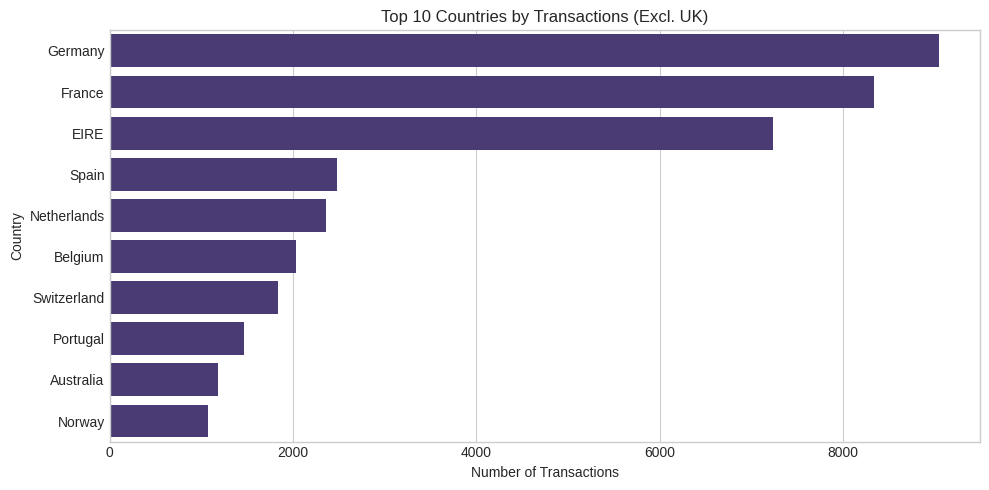

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
# Top Countries by Number of Transactions (excluding UK)
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Transactions (Excl. UK)')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

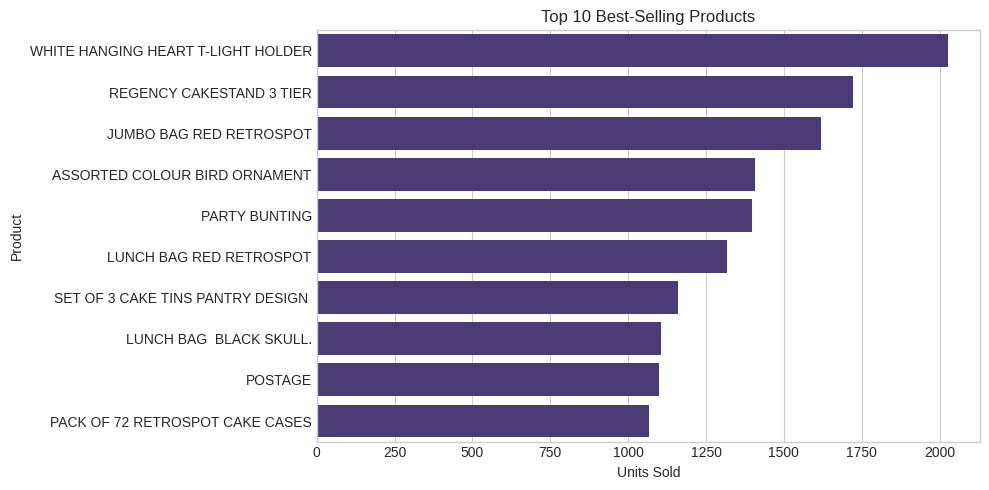

In [ ]:
# Top-Selling Products
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


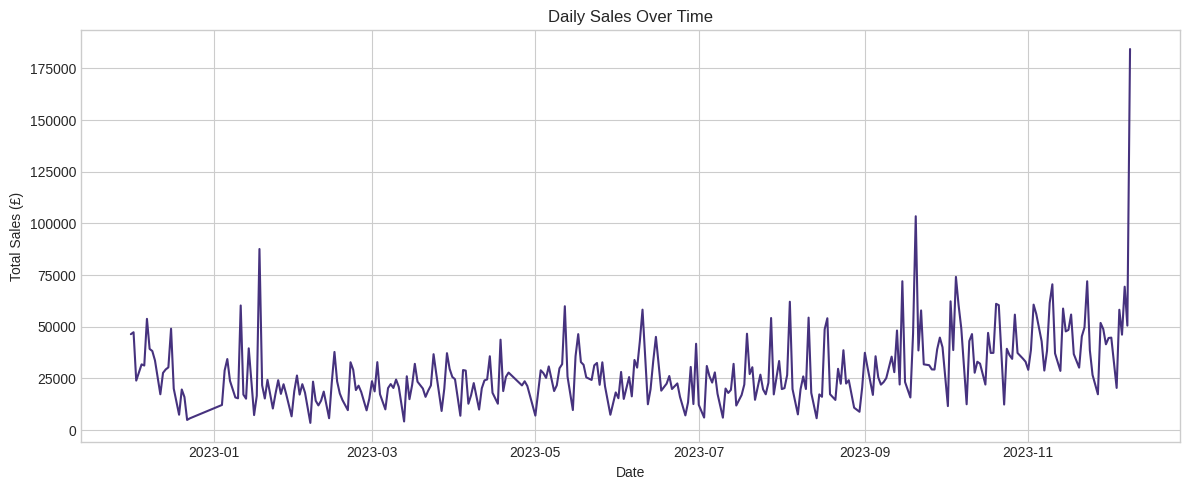

In [ ]:
# Purchase Volume Over Time (by InvoiceDate)
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('InvoiceDateOnly')['TotalPrice'].sum()
plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.grid(True)
plt.tight_layout()
plt.show()

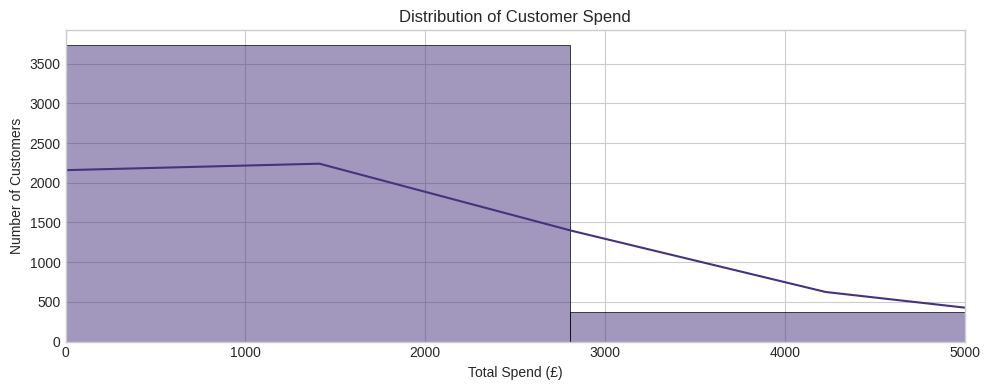

In [ ]:
# Total Spend per Customer
customer_spend = df.groupby('CustomerID')['TotalPrice'].sum()
plt.figure(figsize=(10,4))
sns.histplot(customer_spend, bins=100, kde=True)
plt.title('Distribution of Customer Spend')
plt.xlabel('Total Spend (£)')
plt.ylabel('Number of Customers')
plt.xlim(0, 5000)
plt.tight_layout()
plt.show()


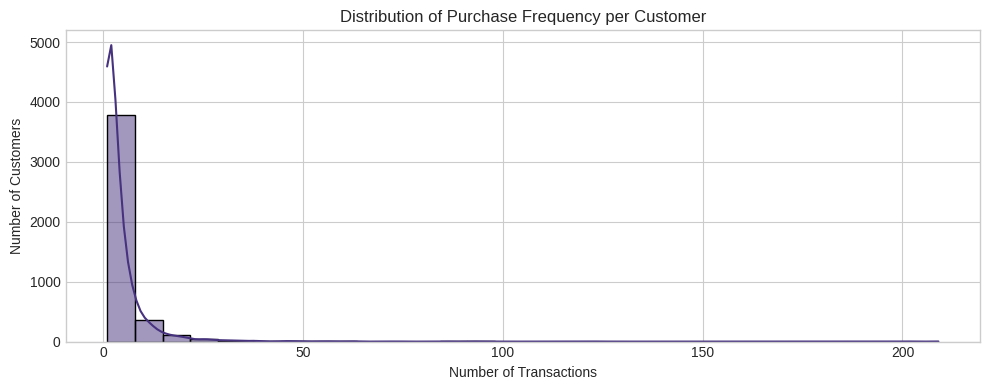

In [ ]:
# Preview for RFM: Frequency Distribution
customer_freq = df.groupby('CustomerID')['InvoiceNo'].nunique()
plt.figure(figsize=(10,4))
sns.histplot(customer_freq, bins=30, kde=True)
plt.title('Distribution of Purchase Frequency per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

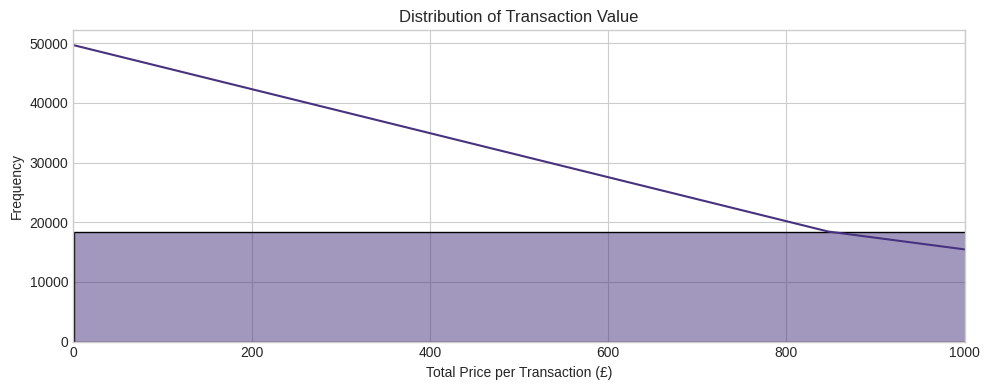

In [ ]:
# Distribution of Spend per Transaction
invoice_total = df.groupby('InvoiceNo')['TotalPrice'].sum()
plt.figure(figsize=(10,4))
sns.histplot(invoice_total, bins=50, kde=True)
plt.title('Distribution of Transaction Value')
plt.xlabel('Total Price per Transaction (£)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()


# ***4. RFM Feature Engineering and Clustering***

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import datetime
# Reference Date = Max date in dataset + 1
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [ ]:
# Calculate RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

In [ ]:
# RFM summary
print("RFM Head:")
display(rfm.head())

RFM Head:


,CustomerID,Recency,Frequency,Monetary
0,12346.00,326,1,77183.60
1,12347.00,2,7,4310.00
2,12348.00,75,4,1797.24
3,12349.00,19,1,1757.55
4,12350.00,310,1,334.40


In [ ]:
# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

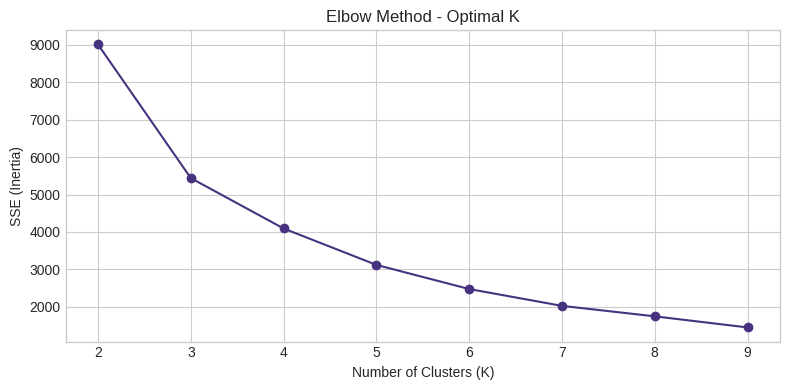

In [ ]:
# Elbow Method to find optimal K
sse = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(rfm_scaled)
    sse.append(km.inertia_)
plt.figure(figsize=(8,4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.tight_layout()
plt.show()

In [ ]:
# Silhouette Score for validation
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"K={k} ➤ Silhouette Score: {score:.4f}")
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

K=2 ➤ Silhouette Score: 0.8958
K=3 ➤ Silhouette Score: 0.5942
K=4 ➤ Silhouette Score: 0.6162
K=5 ➤ Silhouette Score: 0.6165
K=6 ➤ Silhouette Score: 0.5963
K=7 ➤ Silhouette Score: 0.5165
K=8 ➤ Silhouette Score: 0.5175
K=9 ➤ Silhouette Score: 0.4777


In [ ]:
#  Label Segments Based on RFM Means
cluster_profiles = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)
print("\n Cluster Profile (RFM Averages):")
display(cluster_profiles)


 Cluster Profile (RFM Averages):


,Recency,Frequency,Monetary
Cluster,,,
0,43.70,3.68,1359.05
1,248.08,1.55,480.62
2,7.38,82.54,127338.31
3,15.50,22.33,12709.09


In [ ]:
# Assigning manual labels
def label_segment(row):
    if row['Cluster'] == cluster_profiles['Monetary'].idxmax():
        return 'High-Value'
    elif row['Recency'] > rfm['Recency'].quantile(0.75):
        return 'At-Risk'
    elif row['Frequency'] < rfm['Frequency'].median():
        return 'Occasional'
    else:
        return 'Regular'
rfm['Segment'] = rfm.apply(label_segment, axis=1)


In [ ]:
print("\n✅ Sample Segmented Customers:")
display(rfm.sample(5))


✅ Sample Segmented Customers:


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
2585,15858.00,16,5,1438.85,0,Regular
3183,16693.00,69,2,482.01,0,Regular
841,13476.00,179,2,1238.47,1,At-Risk
3600,17272.00,42,4,2148.63,0,Regular
887,13529.00,79,2,307.76,0,Regular


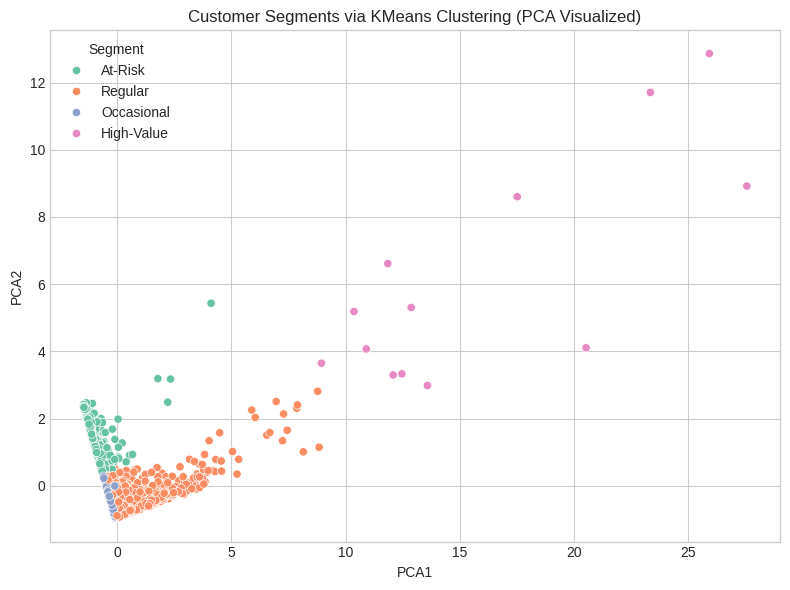

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = pca_components[:,0]
rfm['PCA2'] = pca_components[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Segment', palette='Set2')
plt.title('Customer Segments via KMeans Clustering (PCA Visualized)')
plt.tight_layout()
plt.show()


# ***5. Product Recommendation System***

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Create Customer-Item Matrix
basket = df.pivot_table(index='CustomerID', columns='Description',
                        values='Quantity', aggfunc='sum', fill_value=0)

print(f"✅ Customer-Product matrix shape: {basket.shape}")
product_customer_matrix = basket.T
product_similarity = cosine_similarity(product_customer_matrix)


✅ Customer-Product matrix shape: (4338, 3877)


In [ ]:
product_names = product_customer_matrix.index
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=product_names,
                                     columns=product_names)

print("✅ Similarity matrix shape:", product_similarity_df.shape)


✅ Similarity matrix shape: (3877, 3877)


In [ ]:
def recommend_products(product_name, top_n=5):
    product_name = product_name.strip()

    if product_name not in product_similarity_df.index:
        return f"❌ Product '{product_name}' not found in dataset."

    similar_scores = product_similarity_df[product_name].sort_values(ascending=False)
    recommended = similar_scores.iloc[1:top_n+1]
    print(f"✅ Top {top_n} recommendations for '{product_name}':\n")
    for i, (prod, score) in enumerate(recommended.items(), 1):
        print(f"{i}. {prod} (Similarity: {score:.3f})")

recommend_products("WHITE HANGING HEART T-LIGHT HOLDER")

✅ Top 5 recommendations for 'WHITE HANGING HEART T-LIGHT HOLDER':

1. GIN + TONIC DIET METAL SIGN (Similarity: 0.750)
2. RED HANGING HEART T-LIGHT HOLDER (Similarity: 0.659)
3. WASHROOM METAL SIGN (Similarity: 0.644)
4. LAUNDRY 15C METAL SIGN (Similarity: 0.642)
5. GREEN VINTAGE SPOT BEAKER (Similarity: 0.631)


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pickle
import os

# Create directory to store the model
os.makedirs('app/model', exist_ok=True)

# Save the product similarity dataframe to a file
with open('app/model/product_similarity.pkl', 'wb') as f:
    pickle.dump(product_similarity_df, f)

# Load it back to confirm it works (optional, but good practice)
with open('app/model/product_similarity.pkl', 'rb') as f:
    similarity_df = pickle.load(f)

print("✅ Model saved and re-loaded successfully.")

✅ Model saved and re-loaded successfully.


In [ ]:
def recommend_products(product_name, top_n=5):
    if product_name not in similarity_df.index:
        return []
    similar_scores = similarity_df[product_name].sort_values(ascending=False)
    return list(similar_scores.iloc[1:top_n+1].index)

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load the product similarity model
with open('app/model/product_similarity.pkl', 'rb') as f:
    similarity_df = pickle.load(f)

def recommend_products(product_name, top_n=5):
    if product_name not in similarity_df.index:
        return []
    similar_scores = similarity_df[product_name].sort_values(ascending=False)
    return list(similar_scores.iloc[1:top_n+1].index)

st.set_page_config(page_title="🛒 Shopper Spectrum", layout="centered")
st.title("🛍️ Shopper Spectrum - Product Recommendation & Customer Segmentation")

choice = st.sidebar.radio("Go to:", ["📦 Product Recommendations", "👤 Customer Segmentation"])

if choice == "📦 Product Recommendations":
    st.subheader("🔎 Find Similar Products")

    product_input = st.text_input("Enter Product Name")
    if st.button("Get Recommendations"):
        recommendations = recommend_products(product_input)
        if recommendations:
            st.success(f"✅ Recommended Products for: **{product_input}**")
            for i, rec in enumerate(recommendations, 1):
                st.markdown(f"**{i}. {rec}**")
        else:
            st.warning("⚠️ Product not found in database.")

elif choice == "👤 Customer Segmentation":
    st.subheader("🧠 Predict Customer Segment using RFM")

    # Input fields
    recency = st.number_input("📆 Recency (days since last purchase)", min_value=0)
    frequency = st.number_input("🔁 Frequency (number of transactions)", min_value=0)
    monetary = st.number_input("💸 Monetary (total amount spent)", min_value=0.0, step=1.0)

    if st.button("Predict Segment"):
        # Load same logic from clustering step (can use model or simple rule)
        if monetary > 1000 and frequency > 10 and recency < 30:
            segment = "High-Value"
        elif recency > 100:
            segment = "At-Risk"
        elif frequency <= 3:
            segment = "Occasional"
        else:
            segment = "Regular"

        st.success(f"🎯 Predicted Segment: **{segment}**")

Overwriting app.py


In [ ]:
# Create Customer-Item Matrix
basket = df.pivot_table(index='CustomerID', columns='Description',
                        values='Quantity', aggfunc='sum', fill_value=0)

product_customer_matrix = basket.T
product_similarity = cosine_similarity(product_customer_matrix)

product_names = product_customer_matrix.index
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=product_names,
                                     columns=product_names)

print("✅ Similarity matrix created successfully.")
print("Shape:", product_similarity_df.shape)

✅ Similarity matrix created successfully.
Shape: (3877, 3877)


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.252.9:8501

  Stopping...
  Stopping...


# **Conclusion -**
The Shopper Spectrum: Customer Segmentation & Product Recommendations in E-Commerce project successfully delivers a complete, data-driven framework for understanding customer behavior, segmenting buyers, and providing personalized product recommendations. Through rigorous data preprocessing, detailed exploratory analysis, and RFM-based clustering using KMeans, the project identifies distinct customer segments that can guide targeted marketing and retention strategies. The item-based collaborative filtering recommendation system, powered by cosine similarity, enables relevant cross-selling and upselling opportunities by suggesting products frequently bought together. The integration of these capabilities into a Streamlit web application provides an intuitive interface for real-time insights, making the solution both practical and scalable for deployment in real-world e-commerce environments. Overall, the project demonstrates how advanced analytics and machine learning can transform raw transaction data into actionable business intelligence, improving customer engagement, optimizing inventory, and driving revenue growth.